In [4]:
cd

C:\Users\56961


In [5]:
cd Desktop\portafolio

C:\Users\56961\Desktop\portafolio


In [6]:
get_ipython().magic('reset -sf')

C:\Users\56961\AppData\Local\Temp\ipykernel_23760\3674724974.py:1: DeprecationWarning: `magic(...)` is deprecated since IPython 0.13 (warning added in 8.1), use run_line_magic(magic_name, parameter_s).
  get_ipython().magic('reset -sf')


In [7]:

# cargar librerias

# definir librerias
import random
import numpy as np
import pandas as pd

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sys
import networkx as nx
import pickle 
from collections import Counter
import csv

import networkx.algorithms.isomorphism as iso

import scipy.io as sio
import numpy as np
from datetime import datetime

import seaborn as sns
import pandas as pd
import numpy as np
import io

import warnings
warnings.filterwarnings('ignore', '.*do not.*', )
warnings.warn('DelftStack')
warnings.warn('Do not show this message')
import warnings
warnings.filterwarnings('ignore')


C:\Users\56961\AppData\Local\Temp\ipykernel_23760\2577378604.py:30: UserWarning: DelftStack
  warnings.warn('DelftStack')


In [8]:
from librerias  import alg_fabrica_grafo as alg_grafo

In [9]:
def cargar_grafo_y_sample(densidad,tipo_grafo,parametro,num_graph):
        # input configuracion
    L_metodo_infec=["1","2","3","4","DP","IP"]
    L_porc_nodos_infec=[0.01,0.1,0.5, 0.9]
    L_tipo_sample_p_gral=["5","6","7","8"]
    L_porc_nodos_muestra=[0.01,0.1,0.5,0.9]    
    L_n_metodo_est=[1,2,3,4,5]

    # cargar info de tipo de grafo
    direccion=alg_grafo.nombre_ubi_save(densidad, tipo_grafo,parametro)
    if tipo_grafo=="escala":
        tipo_grafo="algoritmo_escala"
        tipo_grafo_sample="escala"
        alpha="m"+str(int(parametro))        
    else:
        tipo_grafo="algoritmo_aleatorio"
        tipo_grafo_sample="aleatorio"    
        alpha="p"+str(int(1/parametro))    
        
    # cargar grafo
    name_graph ="densidad_"+densidad+"graph_n"+str(n)+alpha+"n°"+str(num_graph)
    file = open(direccion+name_graph, 'rb')
    G= pickle.load(file)
    file.close()

    # cargar diccionario de sample de nodos
    if tipo_grafo=="algoritmo_escala":
        alpha="m"+str(int(parametro))        
        alfa=str(int(parametro))
    else:
        alpha="p"+str(int(1/parametro))    
        alfa=str(int(1/parametro))
    directorio="datos_muestra"+direccion[12:]
    name_save_1="subset"+str(tipo_grafo_sample)+"_num_graph"+str(num_graph)+"_alfa"+str(alfa)
    file = open(directorio+name_save_1, 'rb')
    dic_inf_y_muestreo = pickle.load(file) 
    file.close()
    return G,dic_inf_y_muestreo

In [10]:
densidad="media" 
tipo_grafo="escala"  # "escala"
n=10**4
#parametro=5*10**(-1)
parametro=10
num_graph=10

G,dic_inf_y_muestreo=cargar_grafo_y_sample(densidad,tipo_grafo,parametro,num_graph)

# unir los datos del sample del grafo.



In [11]:
def all_degree_sample(tipo_sample,porc_sample,dic_inf_y_muestreo,dic_grados_G):
    L_metodo_infec=["1","2","3","4","DP","IP"]
    L_porc_nodos_infec=[0.01,0.1,0.5, 0.9]

    lista_degree_sample_all=[]

    for tipo_inf in L_metodo_infec:
        #tipo_inf=1
        for porc_inf in L_porc_nodos_infec:
            #porc_inf=0.01

            key_="tipo_samplemetodo_infec"+str(tipo_inf)+"porc_nodos_infec"+str(porc_inf)+"tipo_muestreo"+str(tipo_sample)+"porc_nodos"+str(porc_sample)
            sample_nodos=dic_inf_y_muestreo[key_]
            
            dist_degree_sample=[]
            for v in sample_nodos:
                dist_degree_sample.append(dic_grados_G[v])
            lista_degree_sample_all.extend(dist_degree_sample)
    return lista_degree_sample_all

In [12]:
# input  (row, column)
tipo_sample=8   # column
porc_sample=0.01 # row
# ----------------------

dic_grados_G=dict(G.degree( list(G.nodes()) ))
dict_nei_G={x_i:list(G.neighbors(x_i))  for x_i in list(G.nodes())}    
nodos_G=list(G.nodes())


lista_degree_sample_all=all_degree_sample(tipo_sample,porc_sample,dic_inf_y_muestreo,dic_grados_G) # junta los grados de todas las muestra de tipo "tipo_sample"

In [13]:

def dist_degree_pob_N_V(nodos_G,dict_nei_G,dic_grados_G):

    dist_Nei_pob=[]
    for v in nodos_G:
        nei_v=dict_nei_G[v]
        dist_Nei_v=[]
        for u in nei_v:
            d_u=dic_grados_G[u]
            dist_Nei_v.append(d_u)
        dist_Nei_pob.extend(dist_Nei_v)

    dist_degree_pob=[]
    for v in nodos_G:
        d_v=dic_grados_G[v]
        dist_degree_pob.append(d_v)
    return dist_Nei_pob,dist_degree_pob
        
        

In [14]:
dist_Nei_pob,dist_degree_pob=dist_degree_pob_N_V(nodos_G,dict_nei_G,dic_grados_G) # calcular la distribucion de grados poblacional y de N(V(G))

In [22]:

# ----------------------
def grafica_dist_grado_sample_vs_pob(nodos_G,dict_nei_G,dic_grados_G,dic_inf_y_muestreo,L_tipo_sample_input):
    L_tipo_sample=["5","6","7","8"]
    L_name_sample=["Uniforme.","Caminata Aleatoria.","Proc. viral probabilístico.","Proc. viral constante."]
    dict_name_sample={a:b for a,b in zip(L_tipo_sample,L_name_sample)}
    L_porc_sample=[0.01,0.1,0.5,0.9]

    dist_Nei_pob,dist_degree_pob=dist_degree_pob_N_V(nodos_G,dict_nei_G,dic_grados_G) # dist poblacional
    cant_filas=len(L_porc_sample)
    cant_colum=len(L_tipo_sample_input)
    fig, axes = plt.subplots(cant_filas,cant_colum , figsize=size_figure, sharex=False, sharey=False)    


    for num_col in range(len(L_tipo_sample_input)):
        for num_row in range(len(L_porc_sample)):
    #num_col,num_row=0,0

            tipo_sample=L_tipo_sample_input[num_col]   # column
            porc_sample=L_porc_sample[num_row]   # row

            # set grado de todos los sample con los parametros
            num_bins=75
            lista_degree_sample_all=all_degree_sample(tipo_sample,porc_sample,dic_inf_y_muestreo,dic_grados_G) 
            if tipo_sample=="5":

                axes[num_row,num_col].hist(lista_degree_sample_all, bins=num_bins, density=True, edgecolor='none', alpha=0.3, fill=True,color="blue",label=dict_name_sample[tipo_sample], log=True)        
                axes[num_row,num_col].hist(dist_degree_pob, bins=num_bins, density=True, edgecolor='black', alpha=1, fill=False,label="Dist grados poblacional.", log=True) 
                axes[num_row,num_col].set_xlabel('V(G)',fontsize=10)
                axes[num_row,num_col].set_title("Dist grados pob v/s dist grados muestreo de prop "+str(int(porc_sample*100))+"%.")
            else:
                axes[num_row,num_col].hist(lista_degree_sample_all, bins=num_bins, density=True, edgecolor='none', alpha=0.3, fill=True,color="blue",label=dict_name_sample[tipo_sample], log=True) 
                axes[num_row,num_col].hist(dist_Nei_pob, bins=num_bins, density=True, edgecolor='black', alpha=1, fill=False,label="Dist de grados de $\mathcal{N}$(V(G)).", log=True) 
                axes[num_row,num_col].set_xlabel('$\mathcal{N}(V(G))$.',fontsize=10)
                axes[num_row,num_col].set_title("Dist. grados $\mathcal{N}(V(G))$ v/s dist. grados muestreo prop "+str(int(porc_sample*100))+"%.")
            axes[num_row,num_col].grid(True)
            axes[num_row,num_col].legend(loc='upper right',fontsize=10)
            axes[num_row,num_col].set_ylabel('Densidad.',fontsize=10)   


    # Ajustar los espacios entre subplots
    plt.tight_layout()          

ValueError: diff requires input that is at least one dimensional

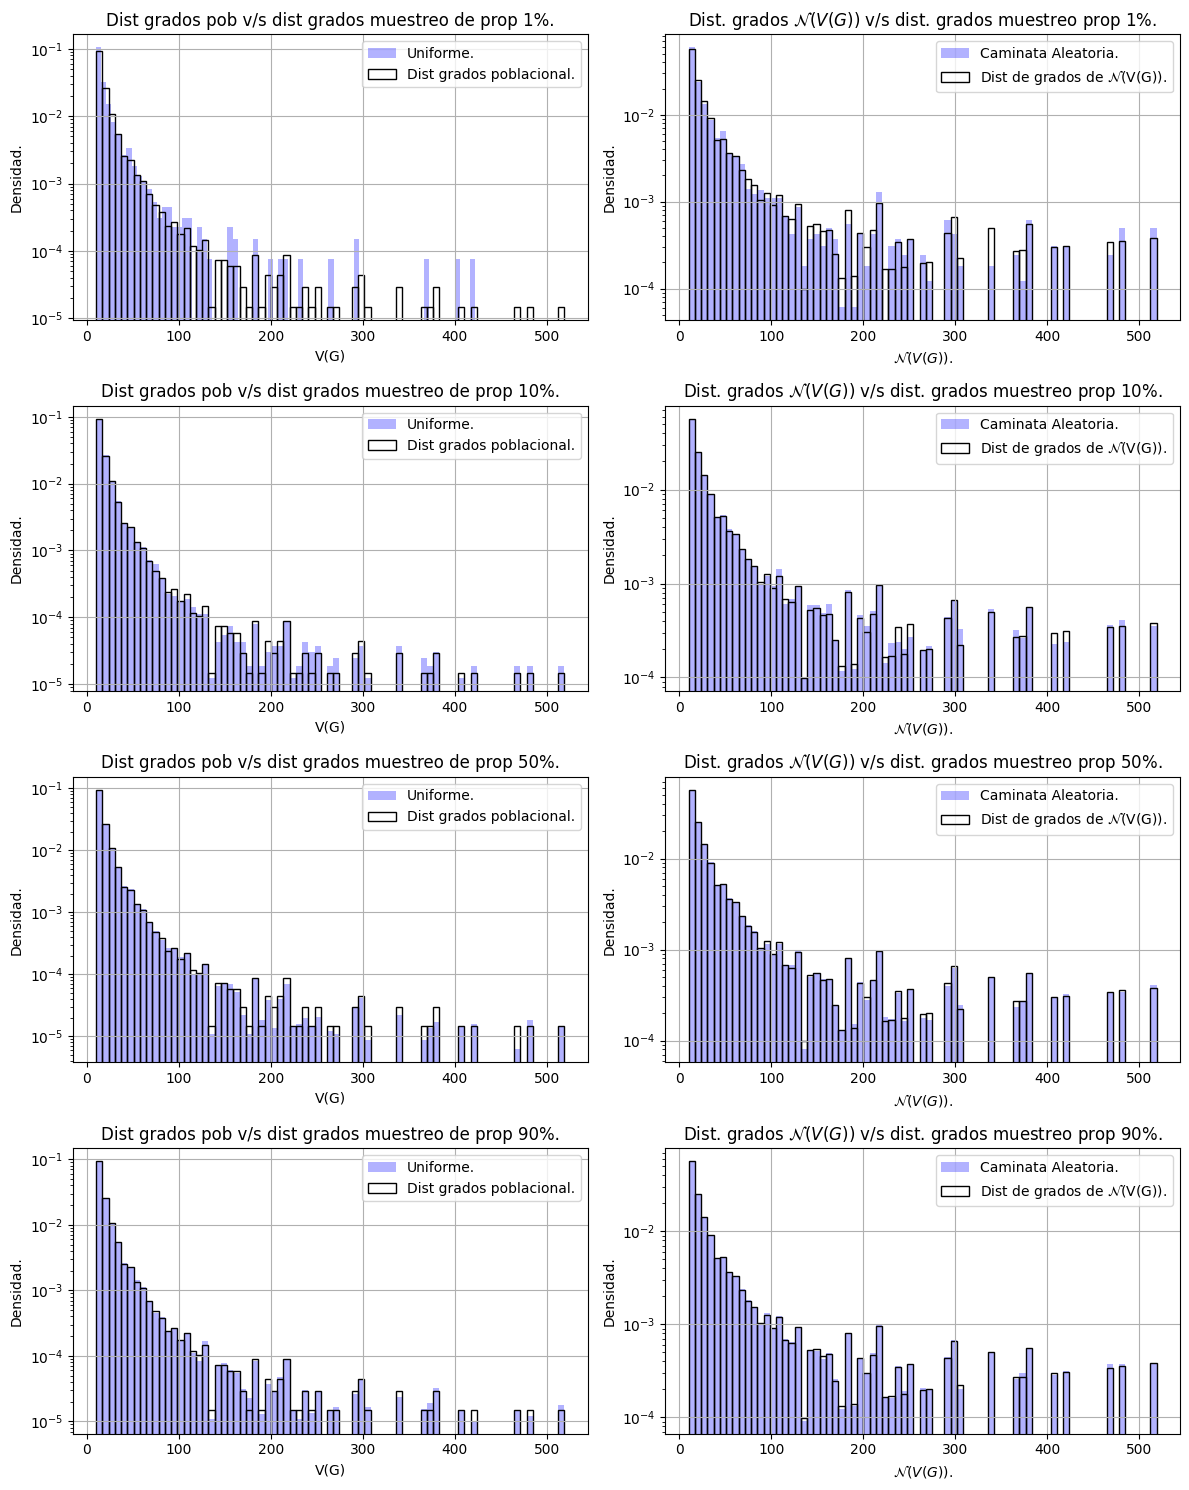

In [23]:
densidad="media" 
tipo_grafo="escala"  # "escala", aleatorio
n=10**4
#parametro=5*10**(-1)
parametro=10
num_graph=25

# ----------------------
G,dic_inf_y_muestreo=cargar_grafo_y_sample(densidad,tipo_grafo,parametro,num_graph)

dic_grados_G=dict(G.degree( list(G.nodes()) ))
dict_nei_G={x_i:list(G.neighbors(x_i))  for x_i in list(G.nodes())}    
nodos_G=list(G.nodes())

cte=3
size_figure=(cte*4,cte*5)
L_tipo_sample_input=["5","6"]
#L_tipo_sample_input=["7","8"]

# ----------------------
grafica_dist_grado_sample_vs_pob(nodos_G,dict_nei_G,dic_grados_G,dic_inf_y_muestreo,L_tipo_sample_input)

# Grafos pesados


KeyboardInterrupt



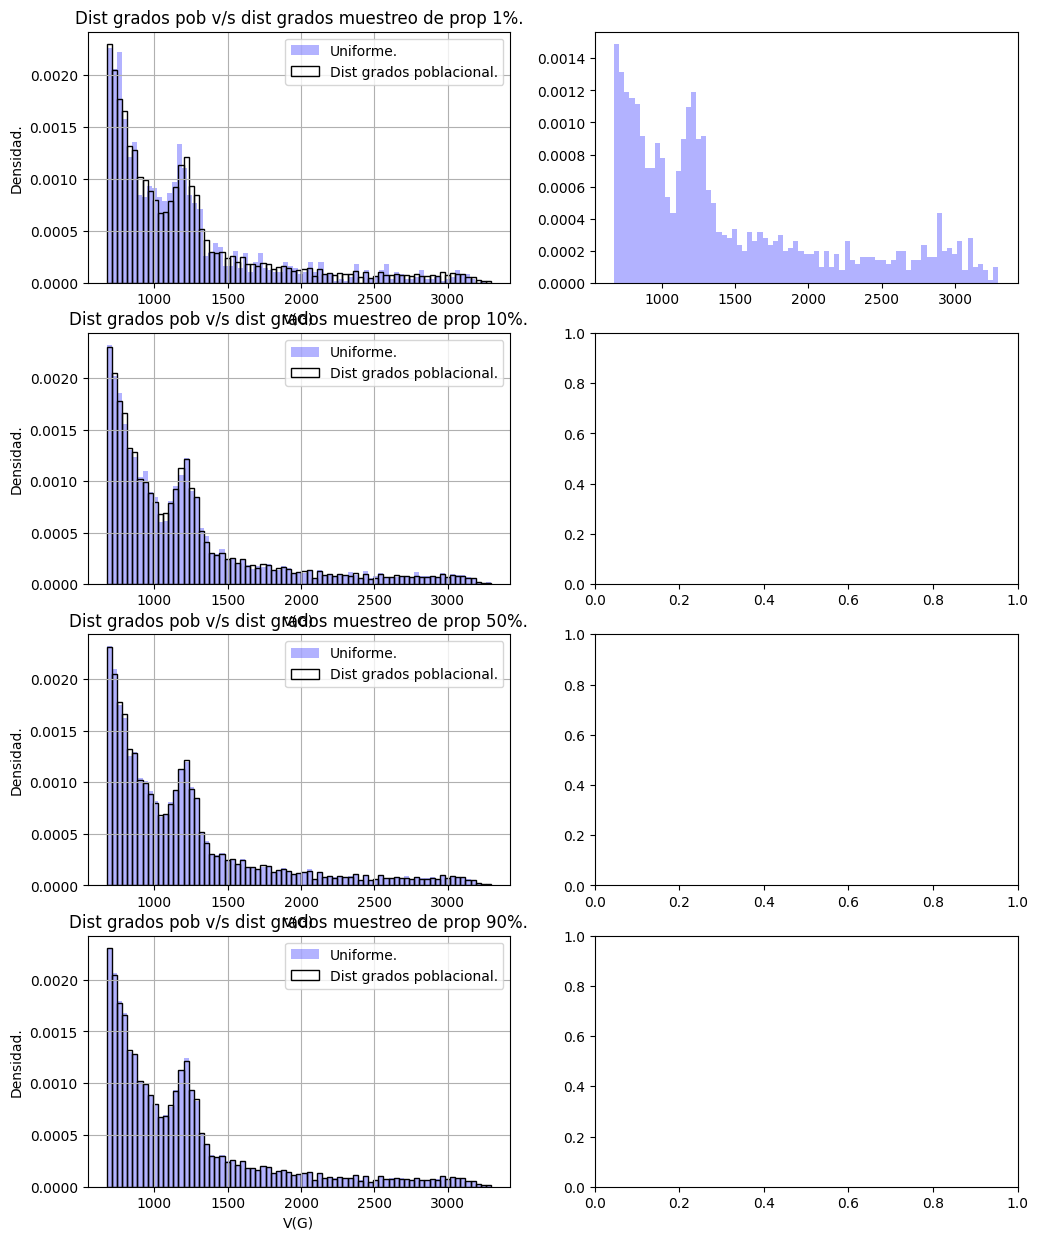

In [11]:
densidad="pesada" 
tipo_grafo="escala"  # "escala", aleatorio
n=6*10**3
parametro=676
num_graph=57

# ----------------------
G,dic_inf_y_muestreo=cargar_grafo_y_sample(densidad,tipo_grafo,parametro,num_graph)

dic_grados_G=dict(G.degree( list(G.nodes()) ))
dict_nei_G={x_i:list(G.neighbors(x_i))  for x_i in list(G.nodes())}    
nodos_G=list(G.nodes())

cte=3
size_figure=(cte*4,cte*5)
L_tipo_sample_input=["5","6","7","8"]
L_tipo_sample_input=["5","6"]
# ----------------------
grafica_dist_grado_sample_vs_pob(nodos_G,dict_nei_G,dic_grados_G,dic_inf_y_muestreo,L_tipo_sample_input)

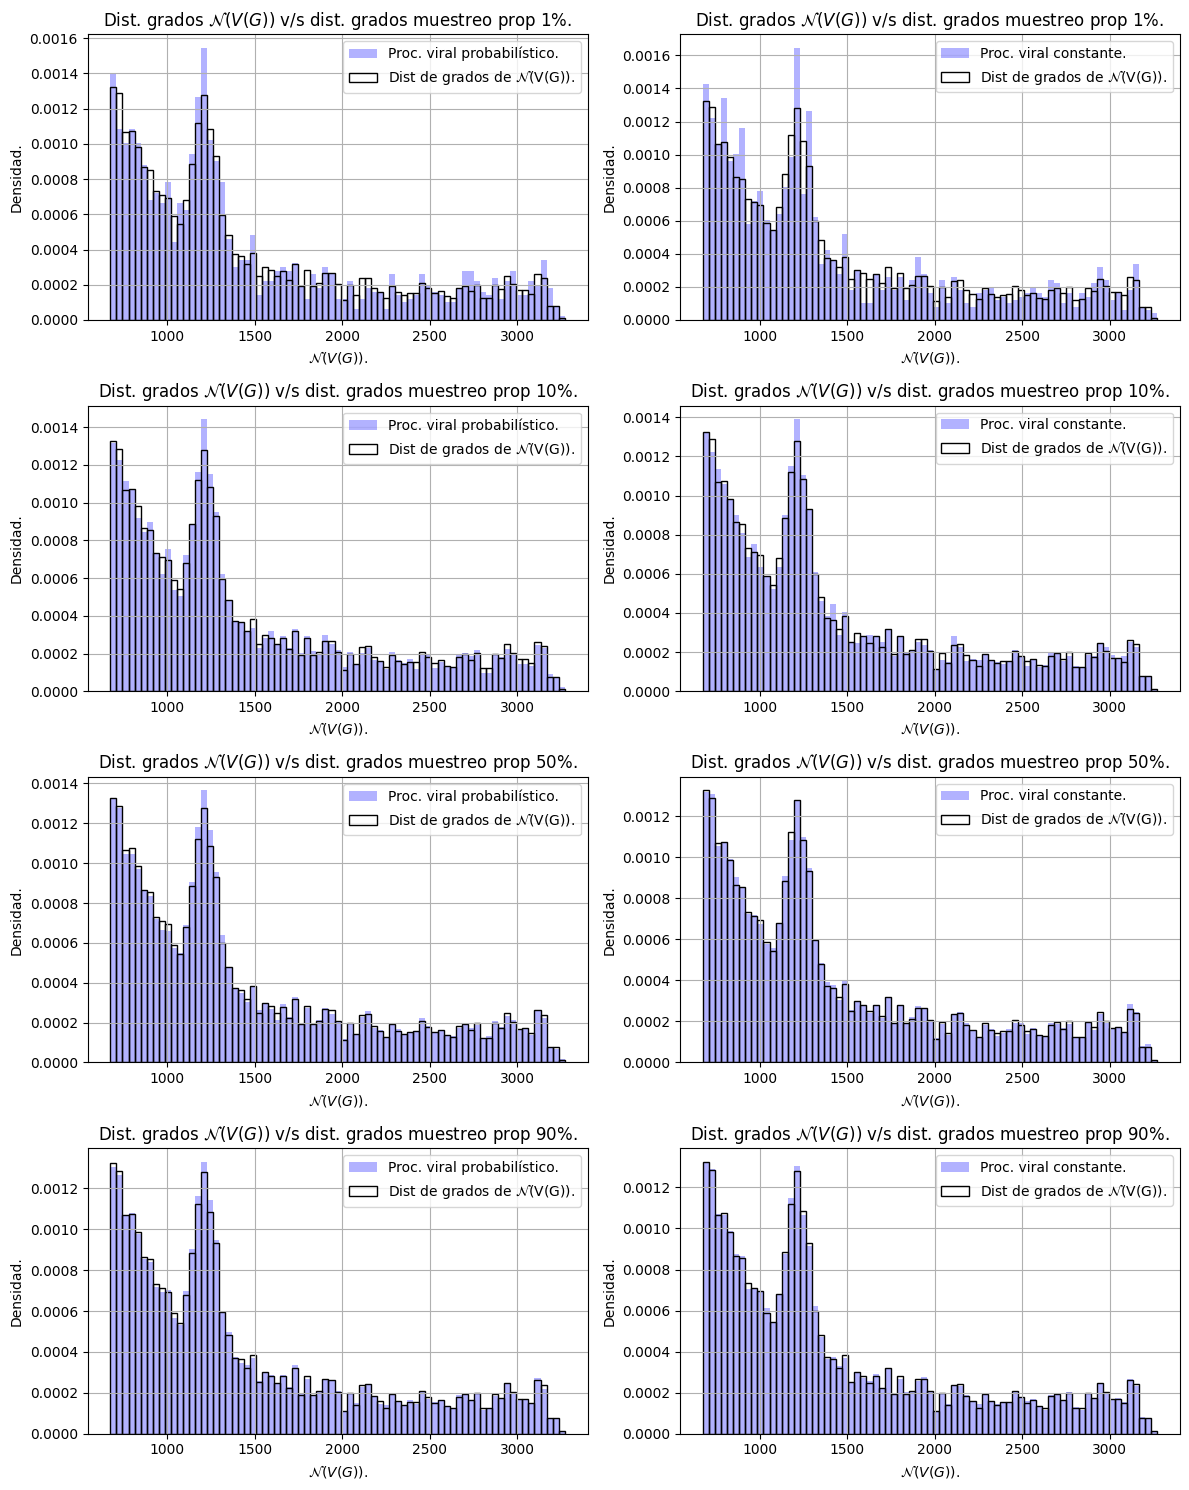

In [20]:
densidad="pesada" 
tipo_grafo="escala"  # "escala", aleatorio
n=6*10**3
parametro=676
num_graph=76

# ----------------------
G,dic_inf_y_muestreo=cargar_grafo_y_sample(densidad,tipo_grafo,parametro,num_graph)

dic_grados_G=dict(G.degree( list(G.nodes()) ))
dict_nei_G={x_i:list(G.neighbors(x_i))  for x_i in list(G.nodes())}    
nodos_G=list(G.nodes())

cte=3
size_figure=(cte*4,cte*5)
L_tipo_sample_input=["5","6","7","8"]
L_tipo_sample_input=["7","8"]
# ----------------------
grafica_dist_grado_sample_vs_pob(nodos_G,dict_nei_G,dic_grados_G,dic_inf_y_muestreo,L_tipo_sample_input)

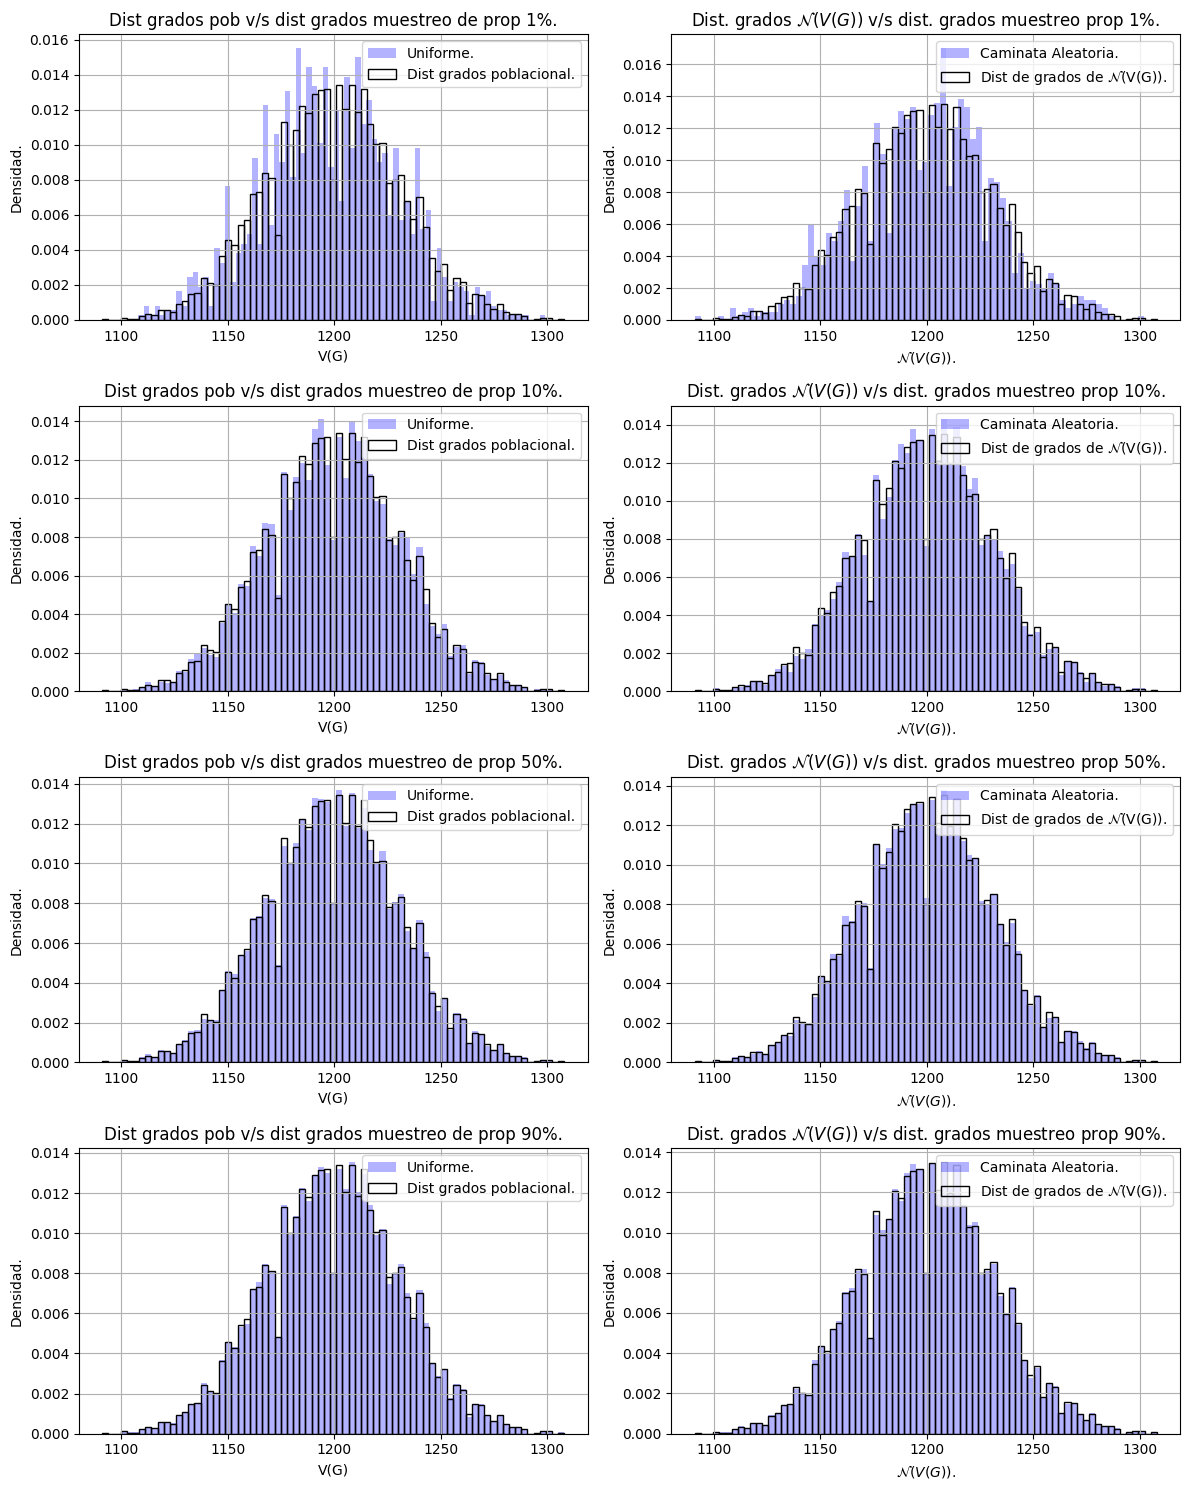

In [21]:
densidad="pesada" 
tipo_grafo="aleatorio"  # "escala", aleatorio
n=6*10**3
parametro=0.2
num_graph=45

# ----------------------
G,dic_inf_y_muestreo=cargar_grafo_y_sample(densidad,tipo_grafo,parametro,num_graph)

dic_grados_G=dict(G.degree( list(G.nodes()) ))
dict_nei_G={x_i:list(G.neighbors(x_i))  for x_i in list(G.nodes())}    
nodos_G=list(G.nodes())

cte=3
size_figure=(cte*4,cte*5)
L_tipo_sample_input=["5","6","7","8"]
L_tipo_sample_input=["5","6"]
# ----------------------
grafica_dist_grado_sample_vs_pob(nodos_G,dict_nei_G,dic_grados_G,dic_inf_y_muestreo,L_tipo_sample_input)

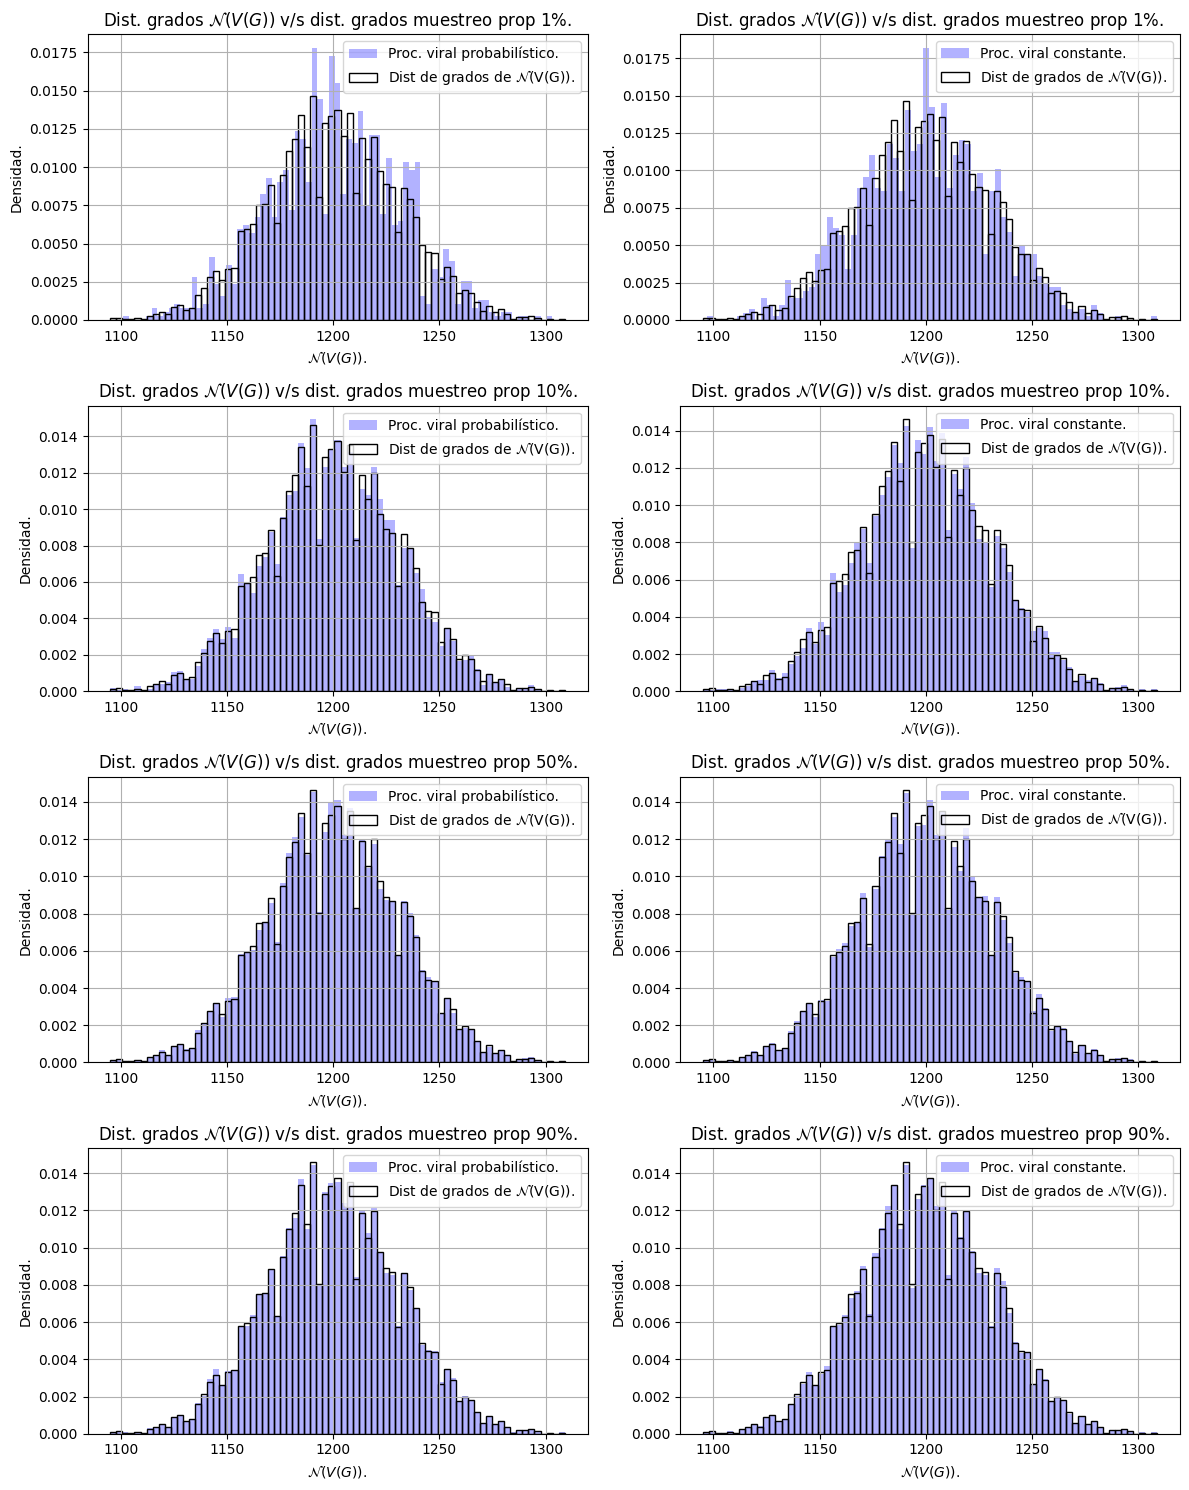

In [22]:
densidad="pesada" 
tipo_grafo="aleatorio"  # "escala", aleatorio
n=6*10**3
parametro=0.2
num_graph=5

# ----------------------
G,dic_inf_y_muestreo=cargar_grafo_y_sample(densidad,tipo_grafo,parametro,num_graph)

dic_grados_G=dict(G.degree( list(G.nodes()) ))
dict_nei_G={x_i:list(G.neighbors(x_i))  for x_i in list(G.nodes())}    
nodos_G=list(G.nodes())

cte=3
size_figure=(cte*4,cte*5)
L_tipo_sample_input=["5","6","7","8"]
L_tipo_sample_input=["7","8"]
# ----------------------
grafica_dist_grado_sample_vs_pob(nodos_G,dict_nei_G,dic_grados_G,dic_inf_y_muestreo,L_tipo_sample_input)

# Grafos de densidad media.

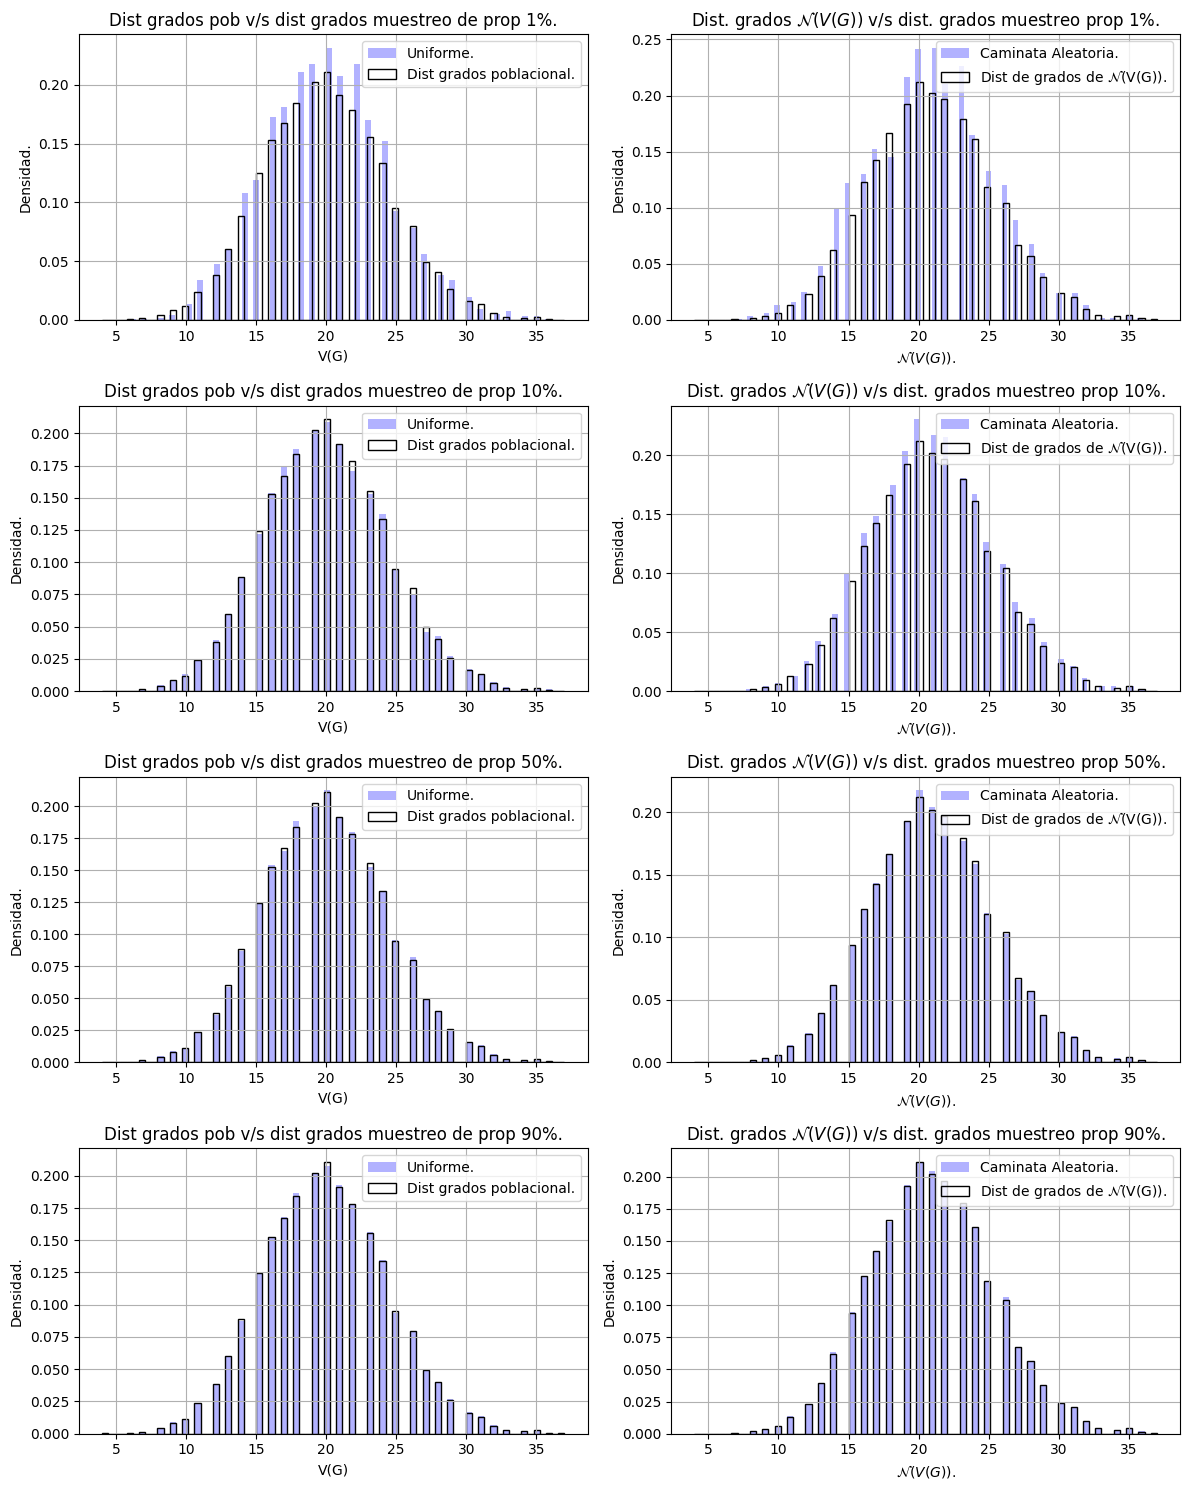

In [11]:
densidad="media" 
tipo_grafo="aleatorio"  # "escala", aleatorio
n=10**4
parametro=2*10**(-3)
num_graph=45

# ----------------------
G,dic_inf_y_muestreo=cargar_grafo_y_sample(densidad,tipo_grafo,parametro,num_graph)

dic_grados_G=dict(G.degree( list(G.nodes()) ))
dict_nei_G={x_i:list(G.neighbors(x_i))  for x_i in list(G.nodes())}    
nodos_G=list(G.nodes())

cte=3
size_figure=(cte*4,cte*5)
L_tipo_sample_input=["5","6","7","8"]
L_tipo_sample_input=["5","6"]
# ----------------------
grafica_dist_grado_sample_vs_pob(nodos_G,dict_nei_G,dic_grados_G,dic_inf_y_muestreo,L_tipo_sample_input)

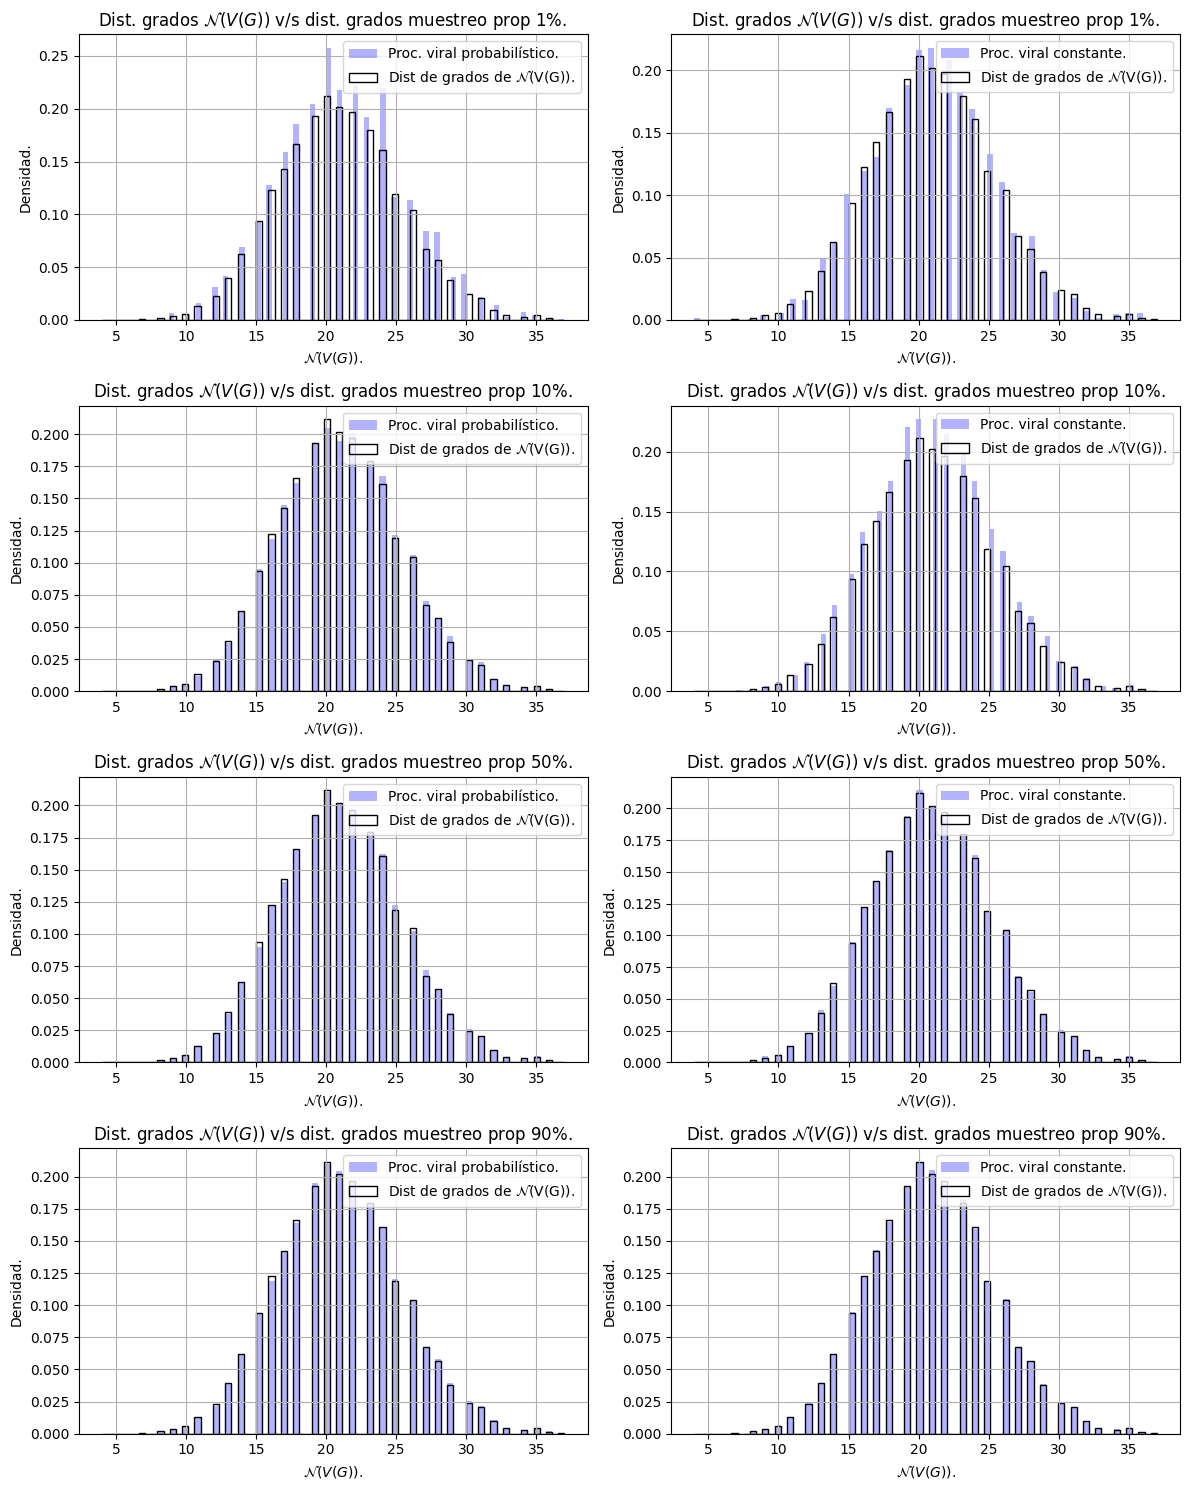

In [12]:
densidad="media" 
tipo_grafo="aleatorio"  # "escala", aleatorio
n=10**4
parametro=2*10**(-3)
num_graph=45

# ----------------------
G,dic_inf_y_muestreo=cargar_grafo_y_sample(densidad,tipo_grafo,parametro,num_graph)

dic_grados_G=dict(G.degree( list(G.nodes()) ))
dict_nei_G={x_i:list(G.neighbors(x_i))  for x_i in list(G.nodes())}    
nodos_G=list(G.nodes())

cte=3
size_figure=(cte*4,cte*5)
L_tipo_sample_input=["5","6","7","8"]
L_tipo_sample_input=["7","8"]
# ----------------------
grafica_dist_grado_sample_vs_pob(nodos_G,dict_nei_G,dic_grados_G,dic_inf_y_muestreo,L_tipo_sample_input)

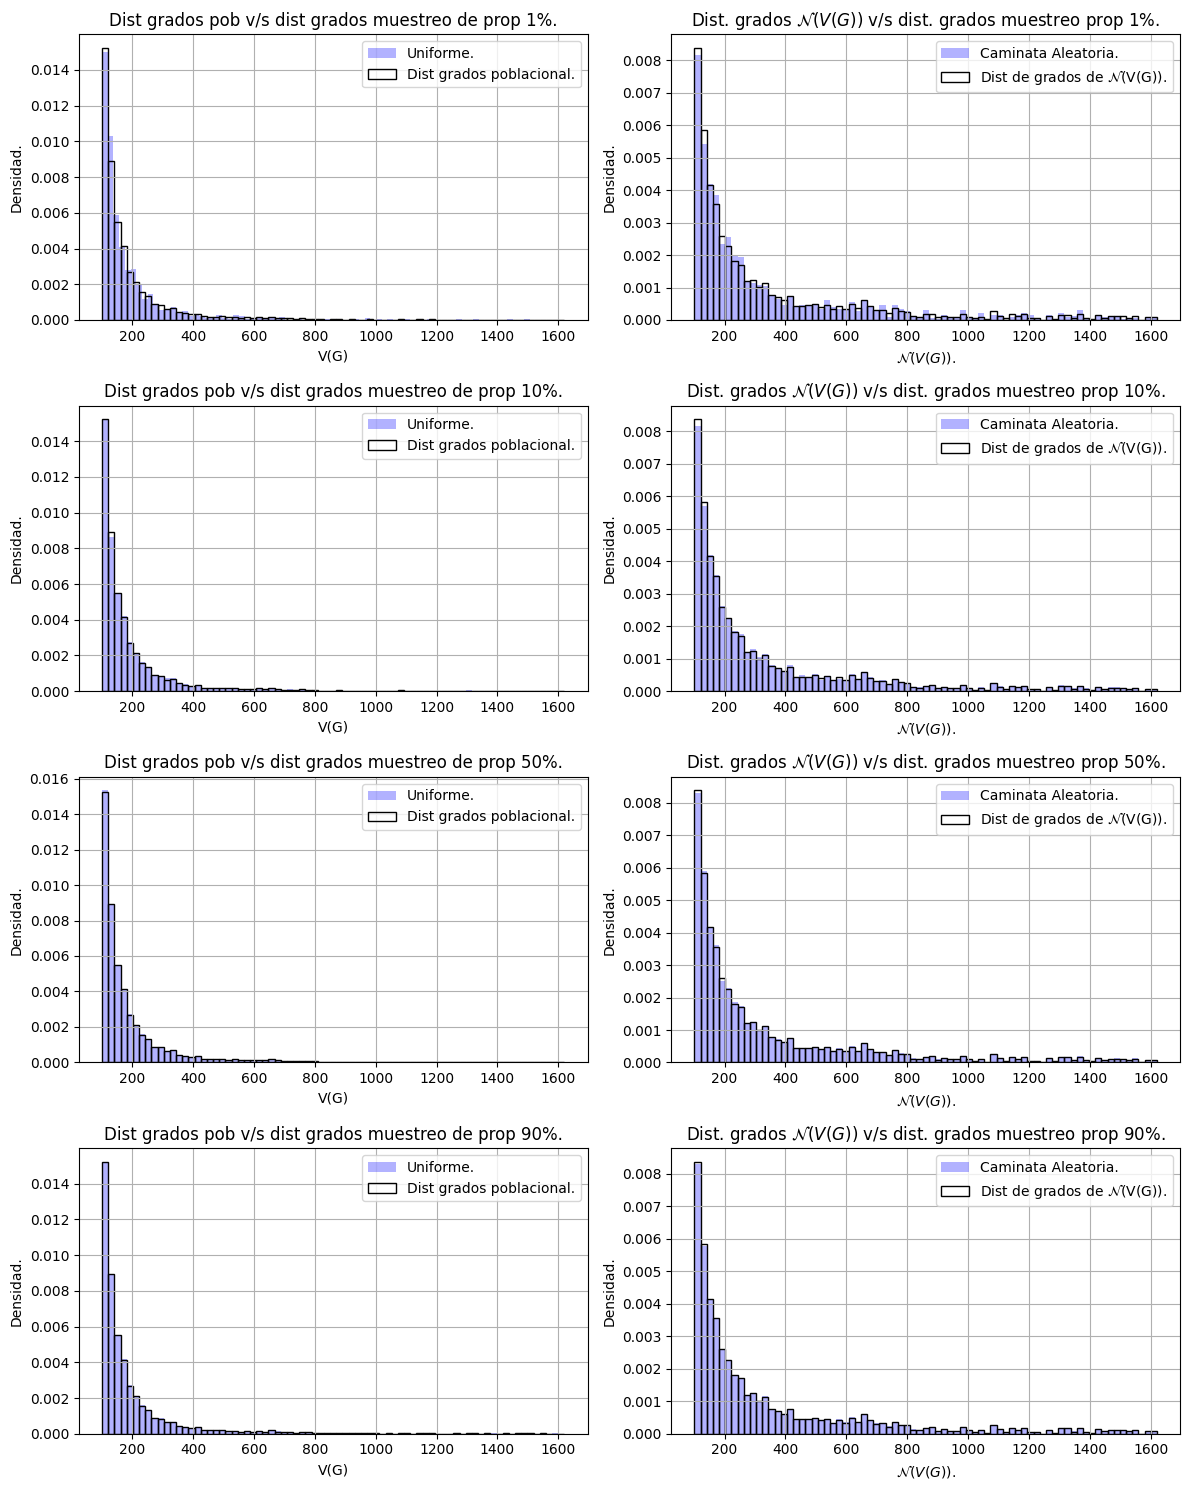

In [13]:
densidad="media" 
tipo_grafo="escala"  # "escala", aleatorio
n=10**4
parametro=101
num_graph=45

# ----------------------
G,dic_inf_y_muestreo=cargar_grafo_y_sample(densidad,tipo_grafo,parametro,num_graph)

dic_grados_G=dict(G.degree( list(G.nodes()) ))
dict_nei_G={x_i:list(G.neighbors(x_i))  for x_i in list(G.nodes())}    
nodos_G=list(G.nodes())

cte=3
size_figure=(cte*4,cte*5)
L_tipo_sample_input=["5","6"]
# ----------------------
grafica_dist_grado_sample_vs_pob(nodos_G,dict_nei_G,dic_grados_G,dic_inf_y_muestreo,L_tipo_sample_input)

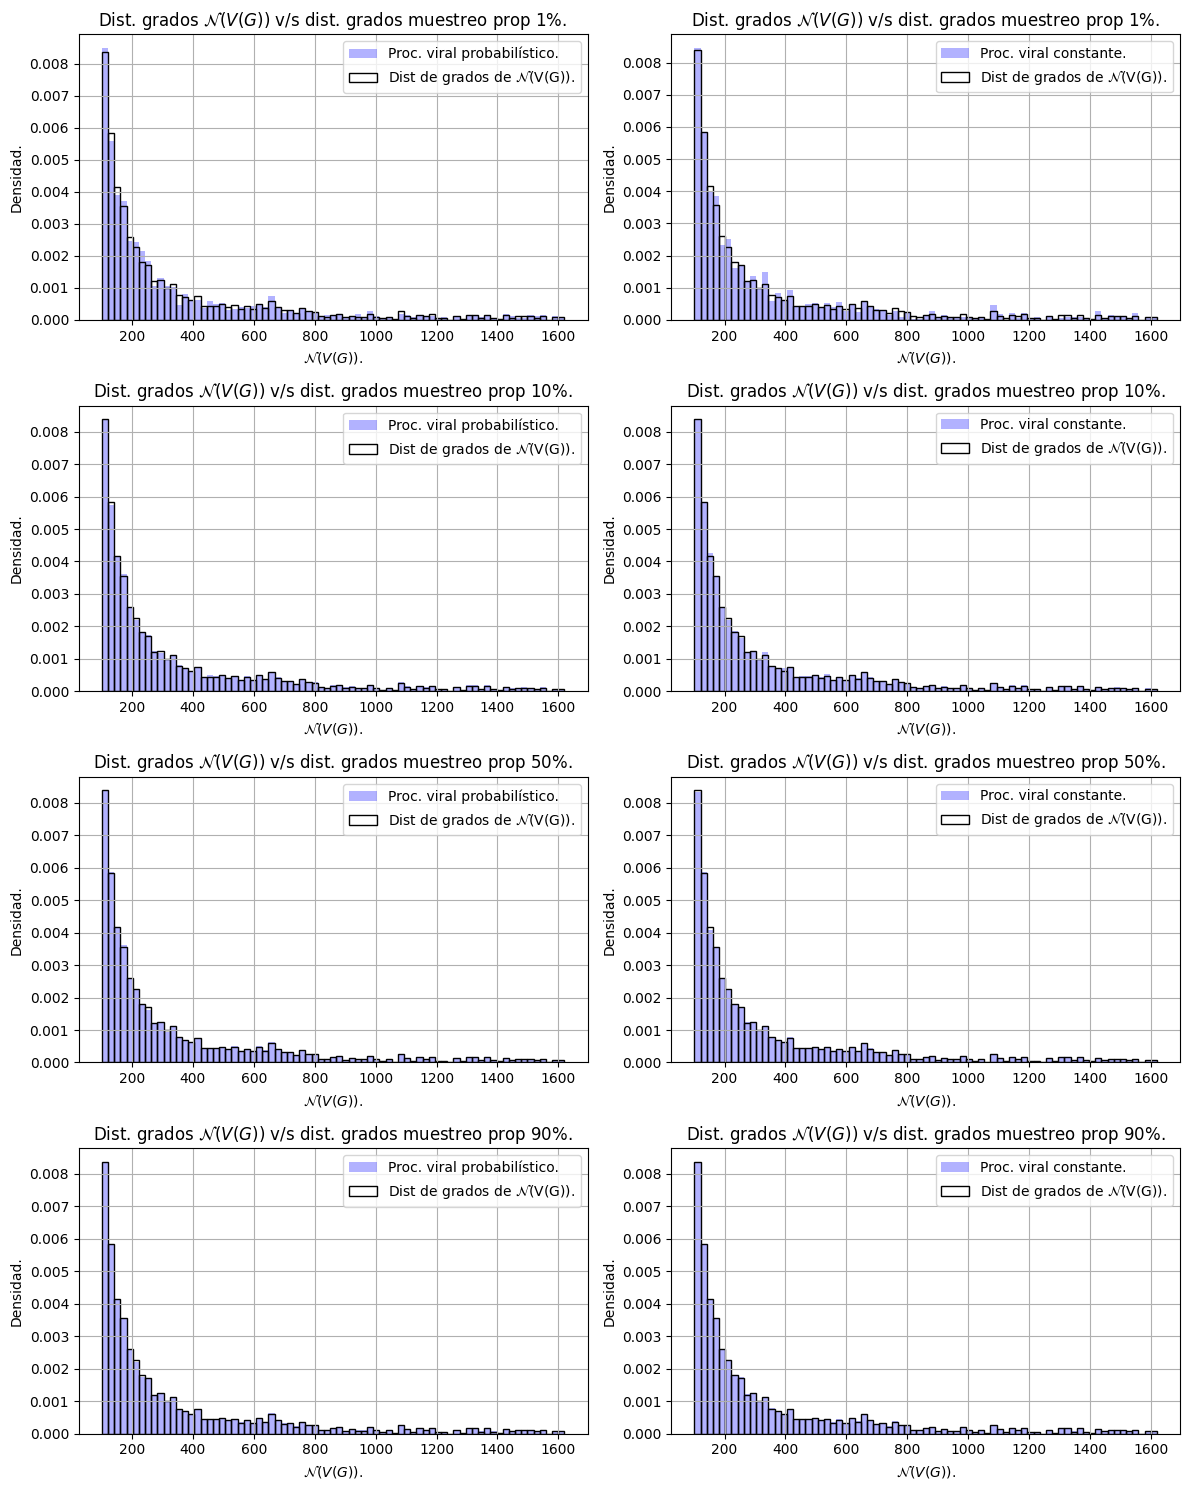

In [14]:
densidad="media" 
tipo_grafo="escala"  # "escala", aleatorio
n=10**4
parametro=101
num_graph=45

# ----------------------
G,dic_inf_y_muestreo=cargar_grafo_y_sample(densidad,tipo_grafo,parametro,num_graph)

dic_grados_G=dict(G.degree( list(G.nodes()) ))
dict_nei_G={x_i:list(G.neighbors(x_i))  for x_i in list(G.nodes())}    
nodos_G=list(G.nodes())

cte=3
size_figure=(cte*4,cte*5)
L_tipo_sample_input=["7","8"]
# ----------------------
grafica_dist_grado_sample_vs_pob(nodos_G,dict_nei_G,dic_grados_G,dic_inf_y_muestreo,L_tipo_sample_input)

# Grafos ligeros.

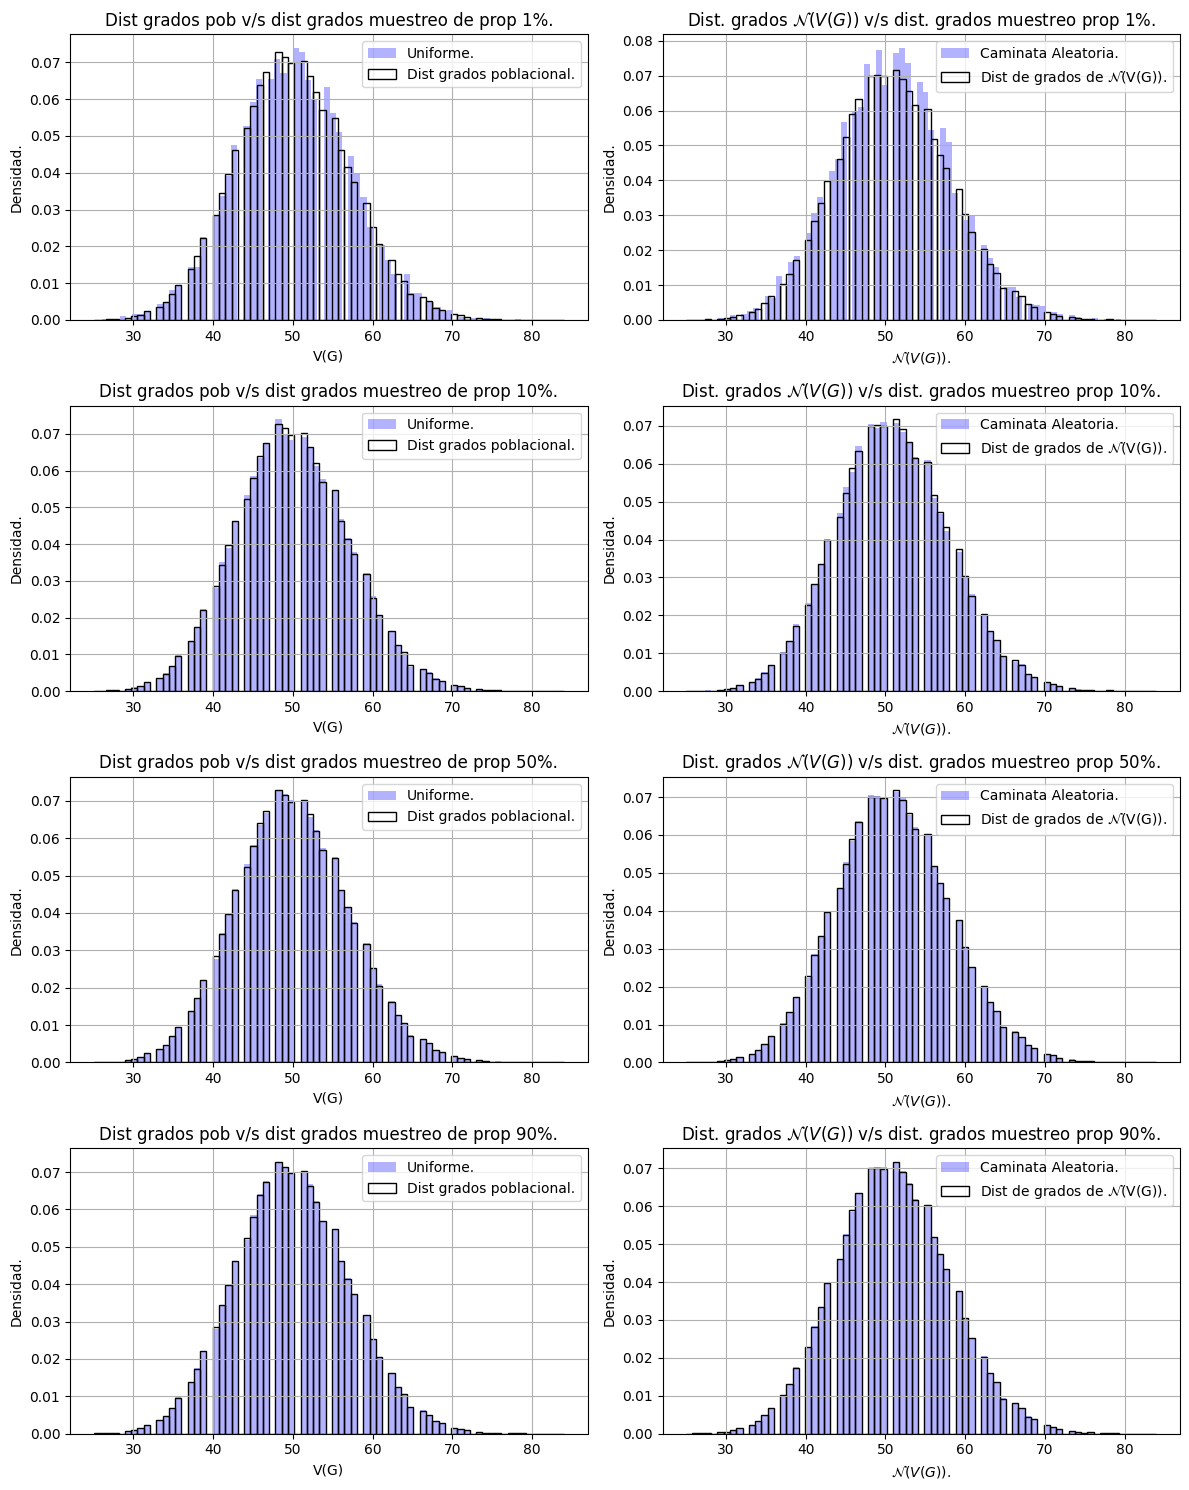

In [15]:
densidad="ligera" 
tipo_grafo="aleatorio"  # "escala", aleatorio
n=5*10**4
parametro=10**(-3)
num_graph=45

# ----------------------
G,dic_inf_y_muestreo=cargar_grafo_y_sample(densidad,tipo_grafo,parametro,num_graph)

dic_grados_G=dict(G.degree( list(G.nodes()) ))
dict_nei_G={x_i:list(G.neighbors(x_i))  for x_i in list(G.nodes())}    
nodos_G=list(G.nodes())

cte=3
size_figure=(cte*4,cte*5)
L_tipo_sample_input=["5","6"]
# ----------------------
grafica_dist_grado_sample_vs_pob(nodos_G,dict_nei_G,dic_grados_G,dic_inf_y_muestreo,L_tipo_sample_input)

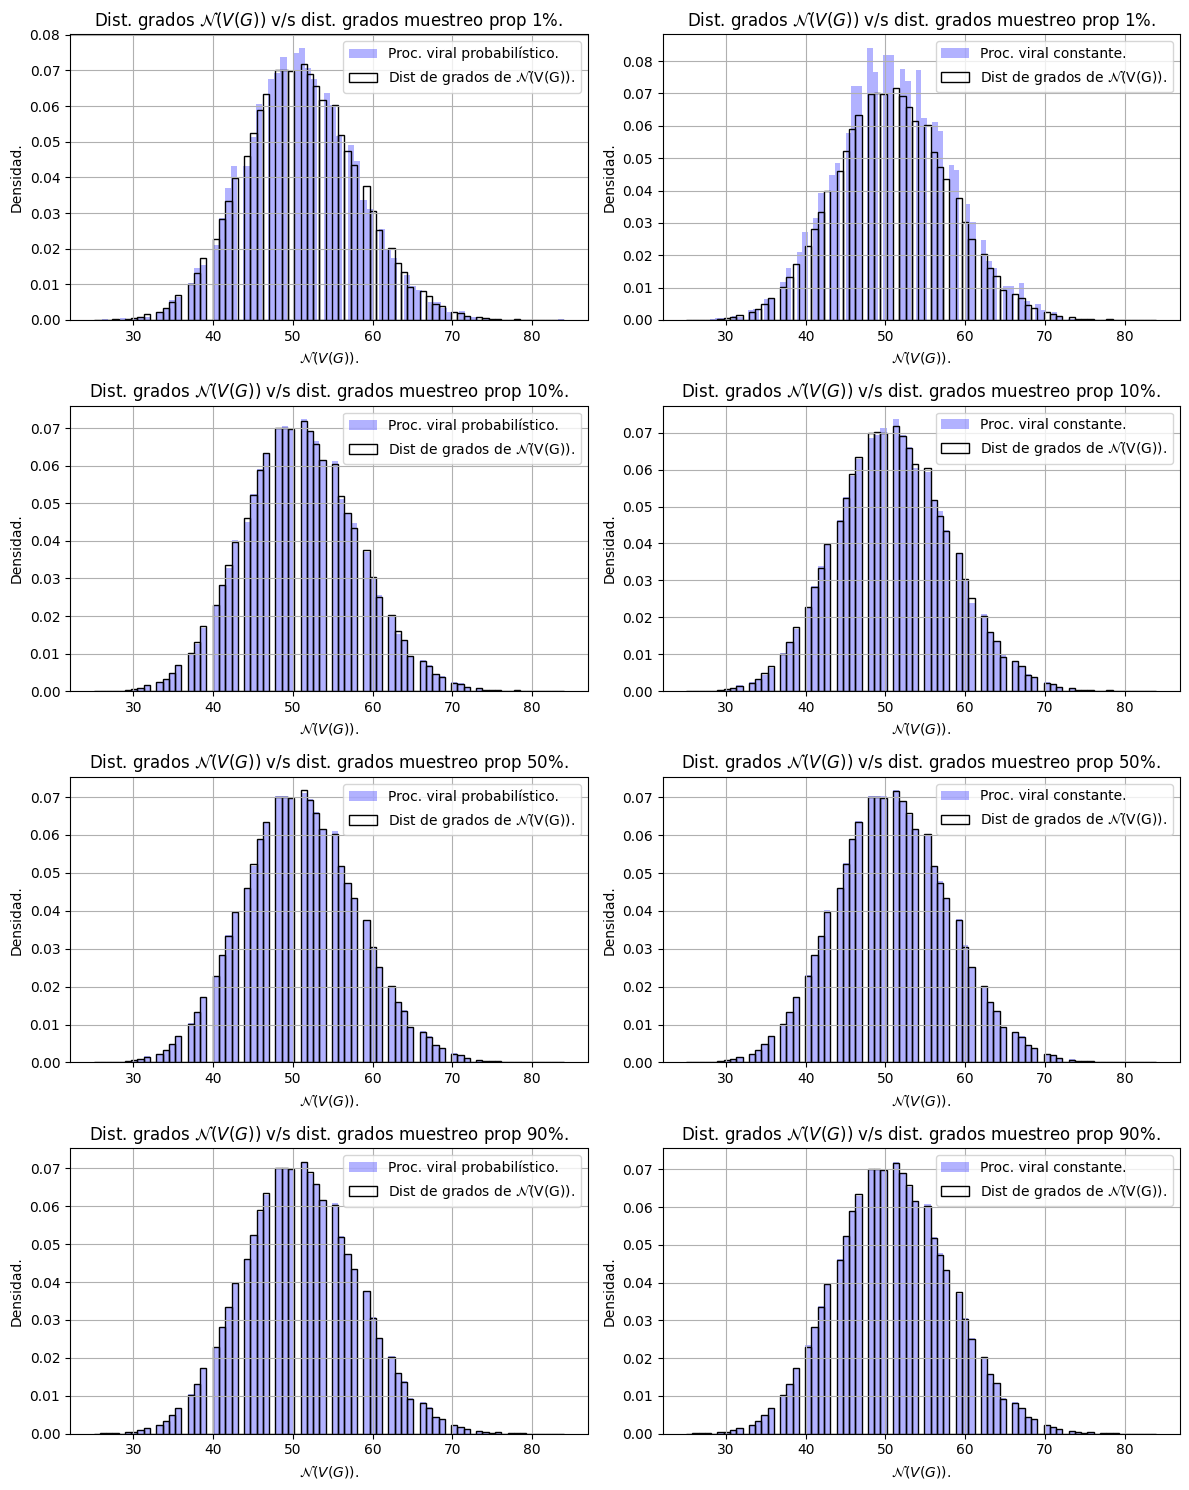

In [16]:
densidad="ligera" 
tipo_grafo="aleatorio"  # "escala", aleatorio
n=5*10**4
parametro=10**(-3)
num_graph=45

# ----------------------
G,dic_inf_y_muestreo=cargar_grafo_y_sample(densidad,tipo_grafo,parametro,num_graph)

dic_grados_G=dict(G.degree( list(G.nodes()) ))
dict_nei_G={x_i:list(G.neighbors(x_i))  for x_i in list(G.nodes())}    
nodos_G=list(G.nodes())

cte=3
size_figure=(cte*4,cte*5)
L_tipo_sample_input=["7","8"]
# ----------------------
grafica_dist_grado_sample_vs_pob(nodos_G,dict_nei_G,dic_grados_G,dic_inf_y_muestreo,L_tipo_sample_input)

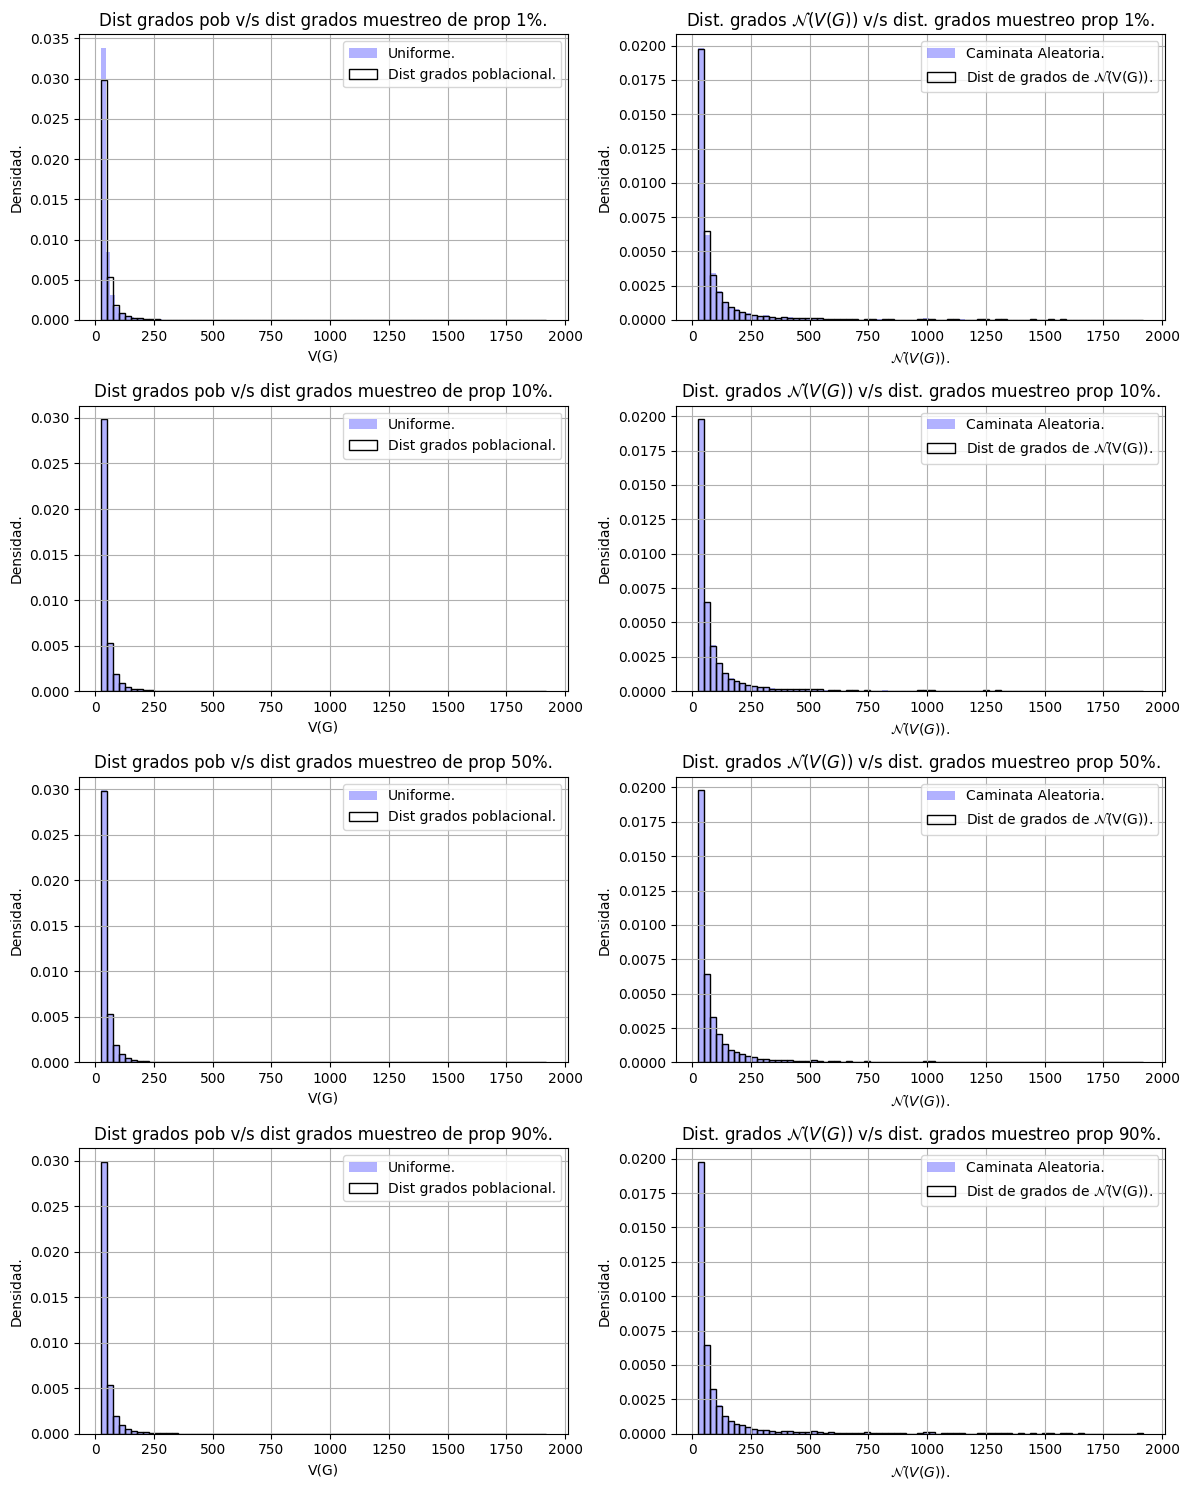

In [17]:
densidad="ligera" 
tipo_grafo="escala"  # "escala", aleatorio
n=5*10**4
parametro=25
num_graph=45

# ----------------------
G,dic_inf_y_muestreo=cargar_grafo_y_sample(densidad,tipo_grafo,parametro,num_graph)

dic_grados_G=dict(G.degree( list(G.nodes()) ))
dict_nei_G={x_i:list(G.neighbors(x_i))  for x_i in list(G.nodes())}    
nodos_G=list(G.nodes())

cte=3
size_figure=(cte*4,cte*5)
L_tipo_sample_input=["5","6"]
# ----------------------
grafica_dist_grado_sample_vs_pob(nodos_G,dict_nei_G,dic_grados_G,dic_inf_y_muestreo,L_tipo_sample_input)

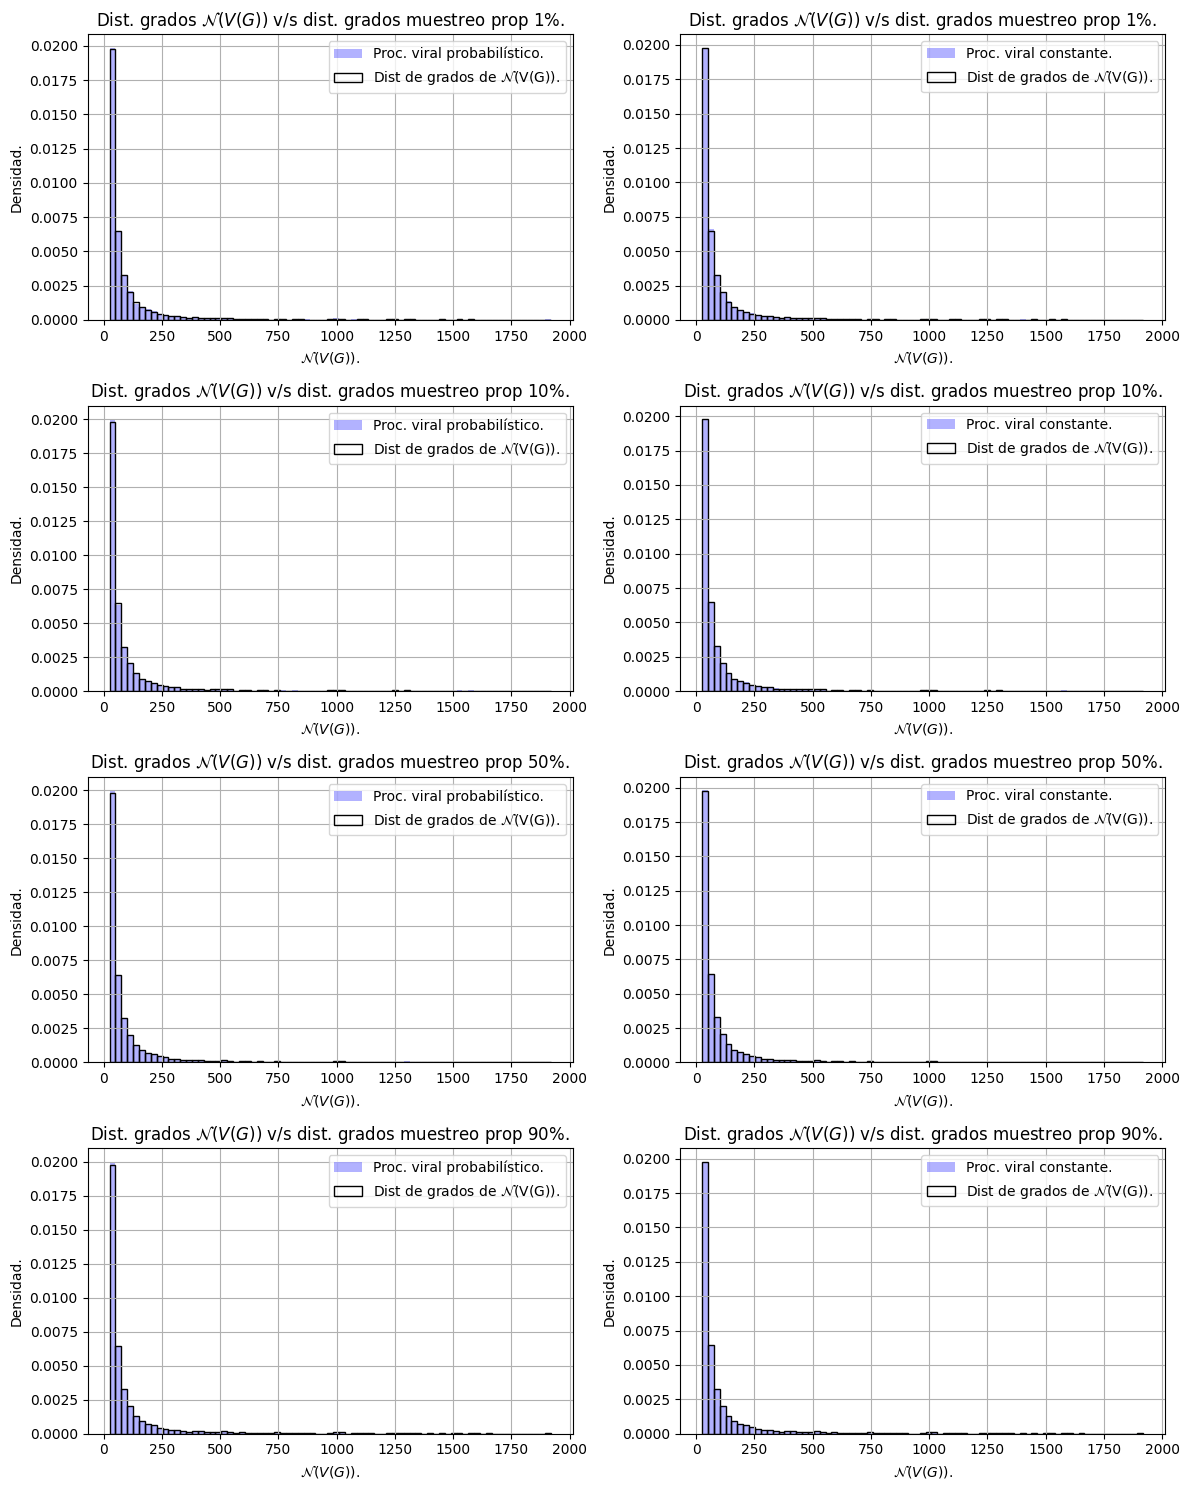

In [18]:
densidad="ligera" 
tipo_grafo="escala"  # "escala", aleatorio
n=5*10**4
parametro=25
num_graph=45

# ----------------------
G,dic_inf_y_muestreo=cargar_grafo_y_sample(densidad,tipo_grafo,parametro,num_graph)

dic_grados_G=dict(G.degree( list(G.nodes()) ))
dict_nei_G={x_i:list(G.neighbors(x_i))  for x_i in list(G.nodes())}    
nodos_G=list(G.nodes())

cte=3
size_figure=(cte*4,cte*5)
L_tipo_sample_input=["7","8"]
# ----------------------
grafica_dist_grado_sample_vs_pob(nodos_G,dict_nei_G,dic_grados_G,dic_inf_y_muestreo,L_tipo_sample_input)